In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score


from warnings import filterwarnings 
filterwarnings("ignore")


pd.options.display.max_columns= 10000
pd.options.display.max_rows=50
#pd.options.display.max_colwidth=-1 
pd.options.display.min_rows=15


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


In [2]:
data = pd.read_csv(r"C:\Users\HP\Desktop\kurs\week 7\Week 7\Python\Iris.csv") 

In [3]:
data.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [4]:
data.shape

(150, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.isnull().sum().sum()

0

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [9]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [11]:
Num_col = data.select_dtypes(exclude = ['object','int64'])

In [12]:
Num_col

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
5              5.4           3.9            1.7           0.4
6              4.6           3.4            1.4           0.3
..             ...           ...            ...           ...
143            6.8           3.2            5.9           2.3
144            6.7           3.3            5.7           2.5
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]

<Axes: >

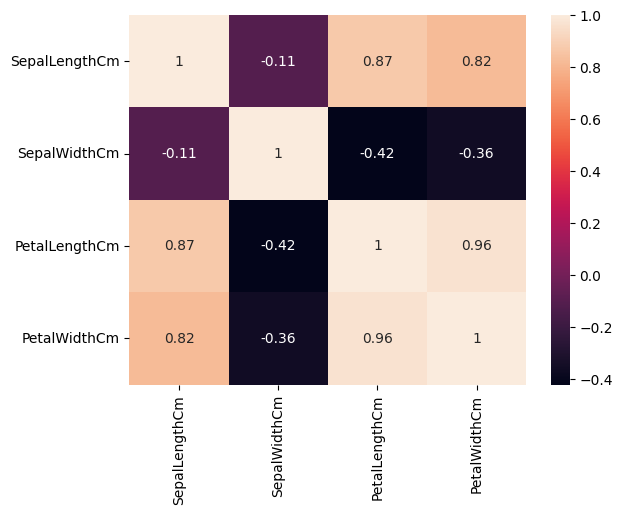

In [14]:
sns.heatmap(Num_col.corr(),annot=True)

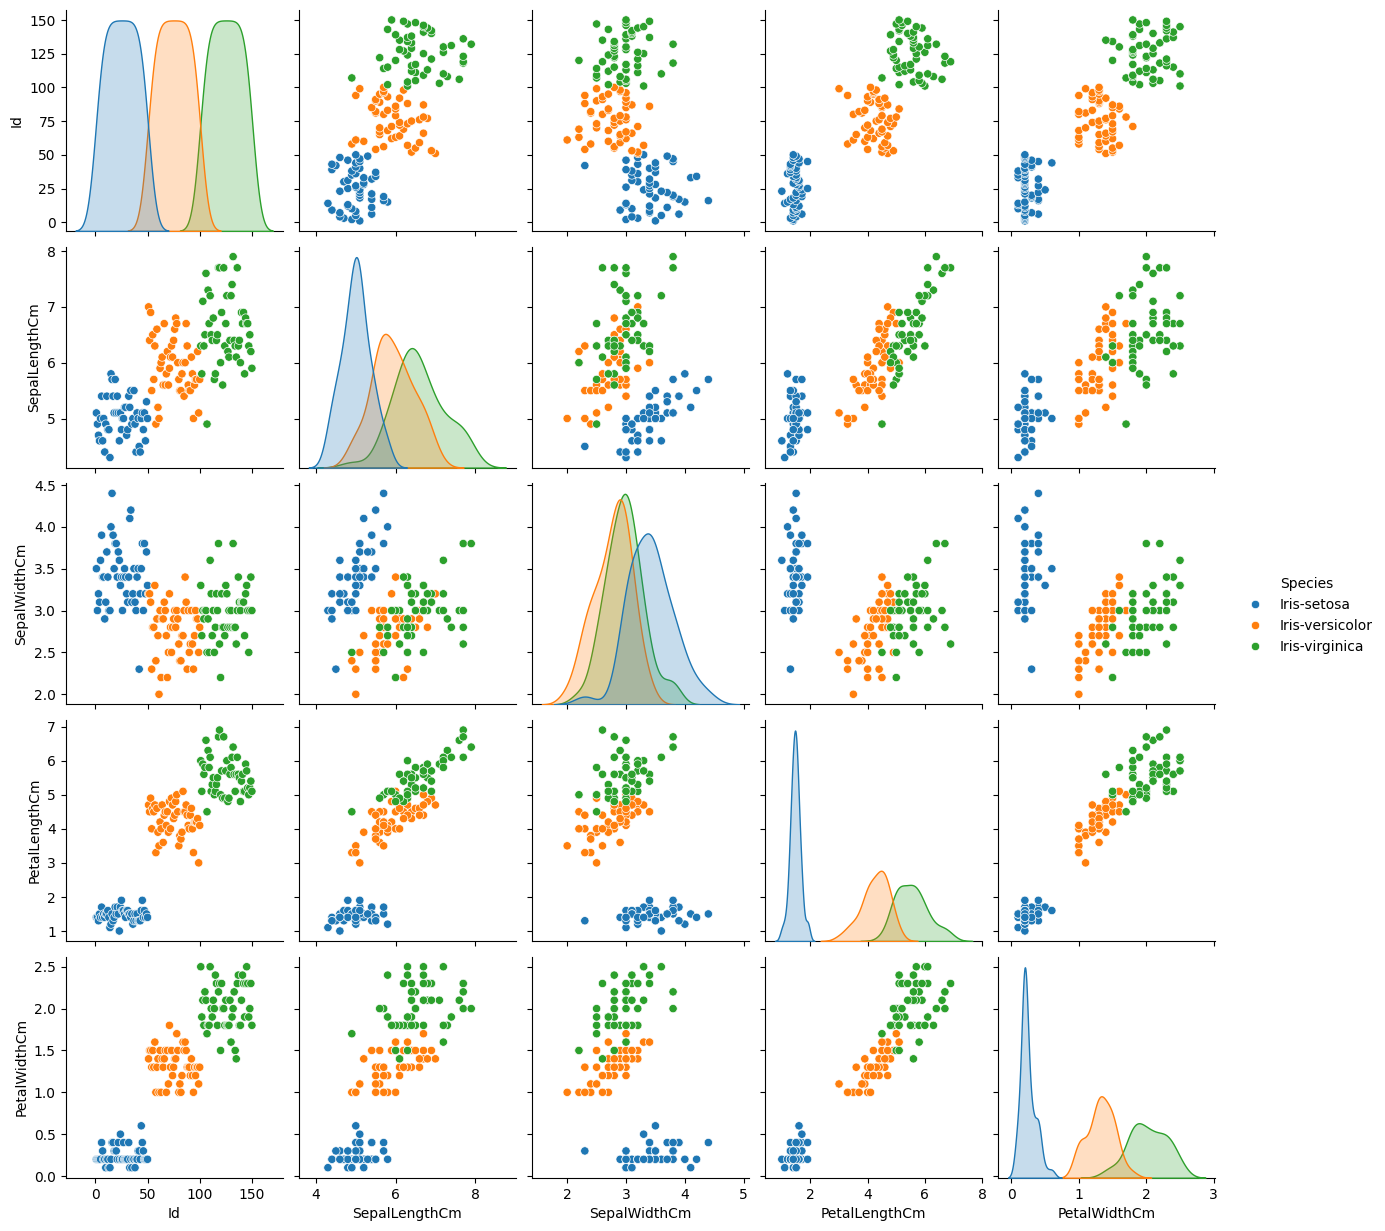

In [15]:
sns.pairplot(data,hue="Species")
plt.show()

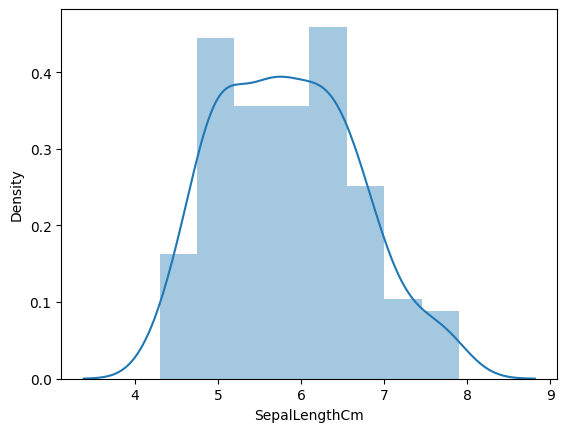

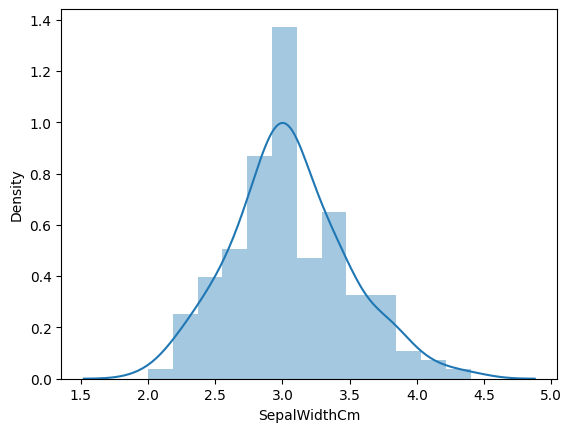

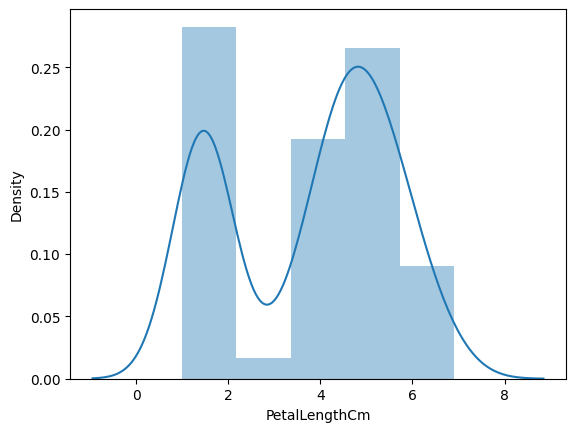

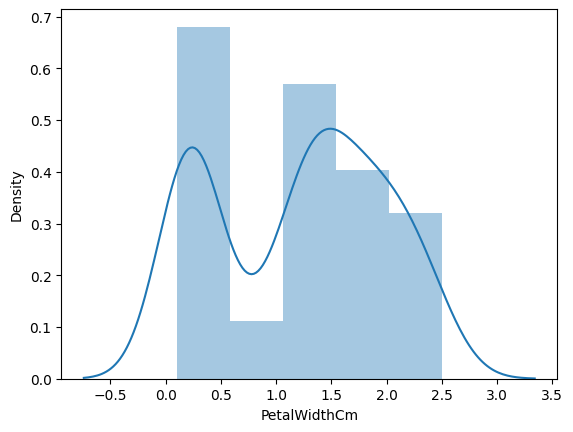

In [16]:
sns.distplot(data['SepalLengthCm'])
plt.show()

sns.distplot(data['SepalWidthCm'])
plt.show()

sns.distplot(data['PetalLengthCm'])
plt.show()

sns.distplot(data['PetalWidthCm'])
plt.show()


In [17]:
data.head(10).style.background_gradient(cmap="Reds")

In [18]:
data.tail(10).style.background_gradient(cmap="Blues")

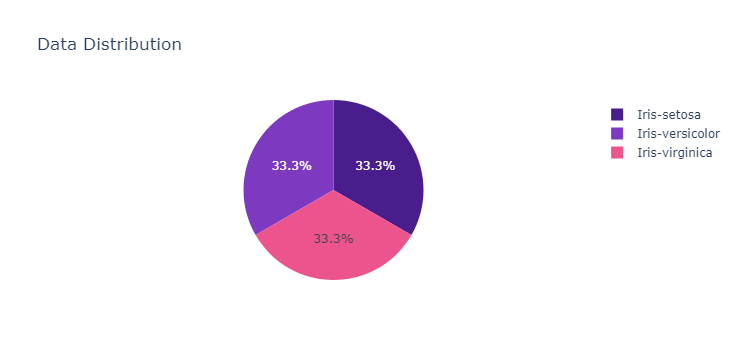

In [19]:

fig = px.pie(data, 'Species',color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'],
             title='Data Distribution',template='plotly')

fig.show()

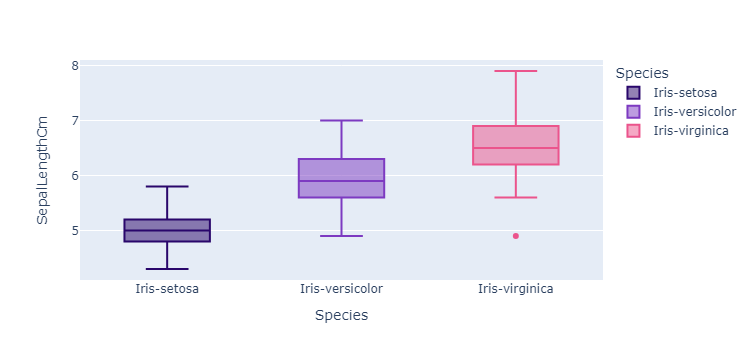

In [20]:
# SepalLength
fig = px.box(data_frame=data, x='Species',y='SepalLengthCm',color='Species',
             color_discrete_sequence=['#29066B','#7D3AC1','#EB548C'],orientation='v')
fig.show()

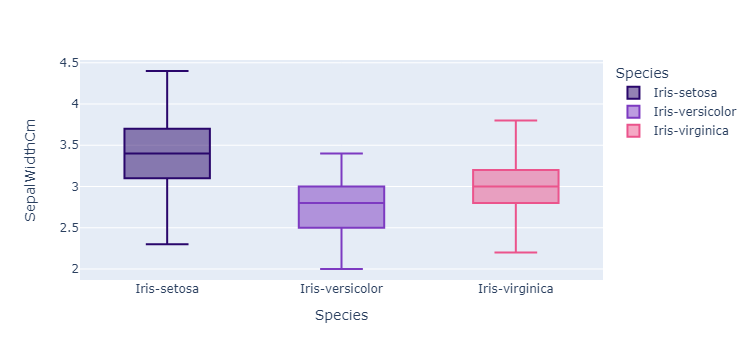

In [21]:
# SepalWidth
fig = px.box(data_frame=data, x='Species',y='SepalWidthCm',color='Species',
             color_discrete_sequence=['#29066B','#7D3AC1','#EB548C'],orientation='v')
fig.show()

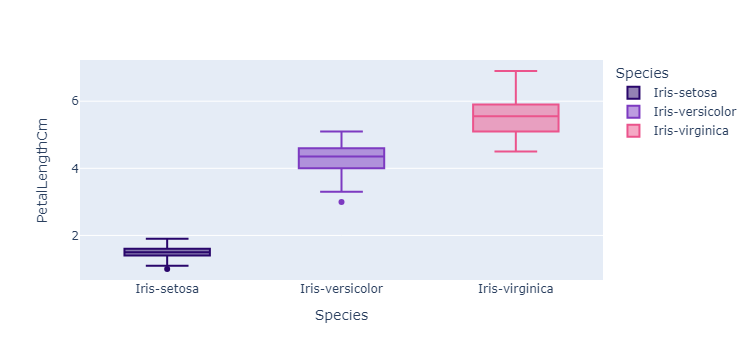

In [22]:
# PetalLength
fig = px.box(data_frame=data, x='Species',y='PetalLengthCm',color='Species',
             color_discrete_sequence=['#29066B','#7D3AC1','#EB548C'],orientation='v')
fig.show()

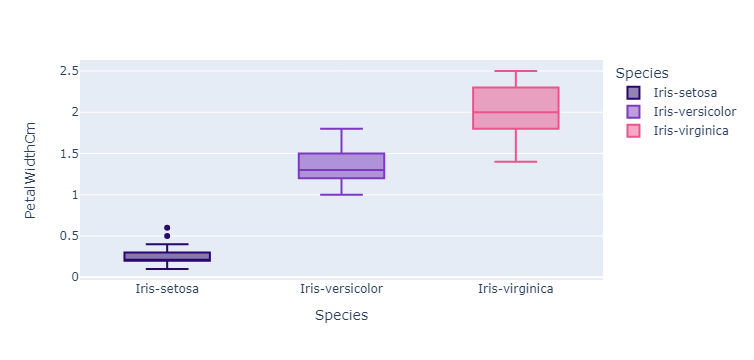

In [23]:
# PetalWidth
fig = px.box(data_frame=data, x='Species',y='PetalWidthCm',color='Species',
             color_discrete_sequence=['#29066B','#7D3AC1','#EB548C'],orientation='v')
fig.show()

In [24]:
x = data.iloc[:, [0, 1, 2, 3]].values

In [25]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

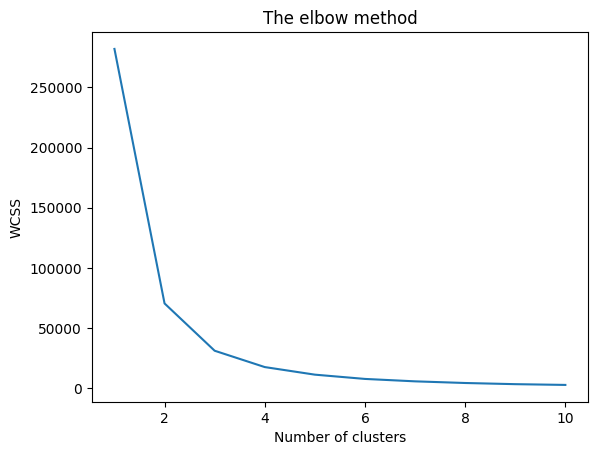

In [26]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [27]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

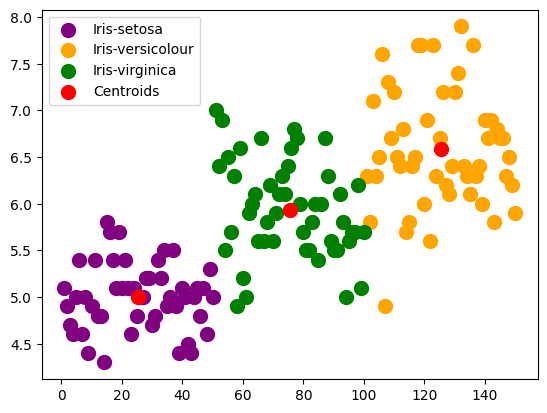

In [28]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

In [29]:
data.fillna(0, inplace=True)  # Filling missing values with zeros; modify this based on your dataset

In [30]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


In [31]:
numerical_cols =['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [32]:
X = data.drop(['Id', 'Species'], axis=1)
y = data['Species']


In [33]:
data

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      1      -0.900681      1.032057      -1.341272     -1.312977        0
1      2      -1.143017     -0.124958      -1.341272     -1.312977        0
2      3      -1.385353      0.337848      -1.398138     -1.312977        0
3      4      -1.506521      0.106445      -1.284407     -1.312977        0
4      5      -1.021849      1.263460      -1.341272     -1.312977        0
5      6      -0.537178      1.957669      -1.170675     -1.050031        0
6      7      -1.506521      0.800654      -1.341272     -1.181504        0
..   ...            ...           ...            ...           ...      ...
143  144       1.159173      0.337848       1.217684      1.447956        2
144  145       1.038005      0.569251       1.103953      1.710902        2
145  146       1.038005     -0.124958       0.819624      1.447956        2
146  147       0.553333     -1.281972       0.705893      0.922064        2
147  148       0.795669     -0.124958       0.819624      1.053537        2
148  149       0.432165      0.800654       0.933356      1.447956        2
149  150       0.068662     -0.124958       0.762759      0.790591        2

[150 rows x 6 columns]

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMeansCluster'] = kmeans.fit_predict(X_scaled)

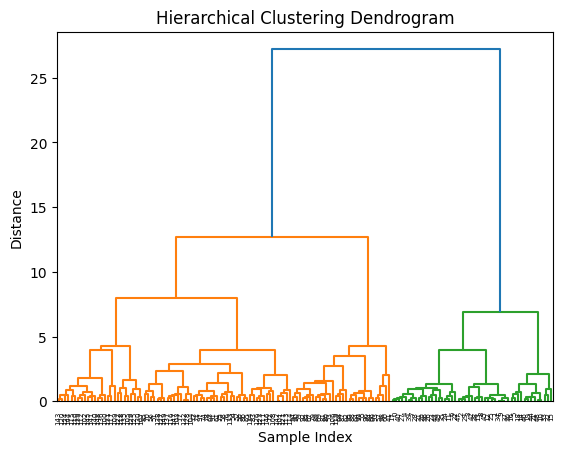

In [36]:
linked = linkage(X_scaled, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [37]:
from scipy.cluster.hierarchy import fcluster
max_d = 3  # Adjust this threshold as needed
clusters = fcluster(linked, max_d, criterion='distance')
data['HierarchicalCluster'] = clusters

In [38]:
true_labels = data.Species 

# Print accuracy for K-means
accuracy_kmeans = accuracy_score(true_labels, data['KMeansCluster'])
print(f'Accuracy for K-means: {accuracy_kmeans}')

# Print accuracy for Hierarchical Clustering
accuracy_hierarchical = accuracy_score(true_labels, data['HierarchicalCluster'])
print(f'Accuracy for Hierarchical Clustering: {accuracy_hierarchical}')

Accuracy for K-means: 0.09333333333333334
Accuracy for Hierarchical Clustering: 0.0
